<a href="https://colab.research.google.com/github/Rohit5950/Data-Cleaning-And-Analysis/blob/main/Aerofit_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AEROFIT BUSINESS CASE_STUDY

**Business Problem**

**The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.**


**This EDA will help to identify the characteristics of the customer on there purchase and give some insight based on the customer profile**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm




# Importing The Data

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

--2024-06-10 07:26:41--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.24, 13.224.9.181, 13.224.9.129, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.24|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7279 (7.1K) [text/plain]
Saving to: ‘aerofit_treadmill.csv?1639992749’

aerofit_treadmill.c 100%[===================>]   7.11K  --.-KB/s    in 0s      

2024-06-10 07:26:41 (2.25 GB/s) - ‘aerofit_treadmill.csv?1639992749’ saved [7279/7279]



# Reading The Csv File

In [ ]:
data = pd.read_csv("aerofit_treadmill.csv?1639992749")

# Top 5 Data

In [ ]:
data.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


# NO of Rows and Columns

In [ ]:
data.shape

(180, 9)

# Information About The Data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


# Checking The Null Values

In [ ]:
data.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

# INSIGHT

**This data has no null value**

In [ ]:
data.value_counts()

Product  Age  Gender  Education  MaritalStatus  Usage  Fitness  Income  Miles
KP281    18   Male    14         Single         3      4        29562   112      1
KP481    30   Female  13         Single         4      3        46617   106      1
         31   Female  16         Partnered      2      3        51165   64       1
                      18         Single         2      1        65220   21       1
              Male    16         Partnered      3      3        52302   95       1
                                                                                ..
KP281    34   Female  16         Single         2      2        52302   66       1
              Male    16         Single         4      5        51165   169      1
         35   Female  16         Partnered      3      3        60261   94       1
                      18         Single         3      3        67083   85       1
KP781    48   Male    18         Partnered      4      5        95508   180      1
Name: cou

In [ ]:
data.describe(include = "all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [ ]:
data.groupby("Product")["Miles"].max()

Product
KP281    188
KP481    212
KP781    360
Name: Miles, dtype: int64

# Total Counts Of Products

In [ ]:
data["Product"].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

# Unique products

In [ ]:
data["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

## There are three unique products('KP281', 'KP481', 'KP781') where kP281 is the entry level and KP481 is intermediate and KP781 is a bit advanced level.



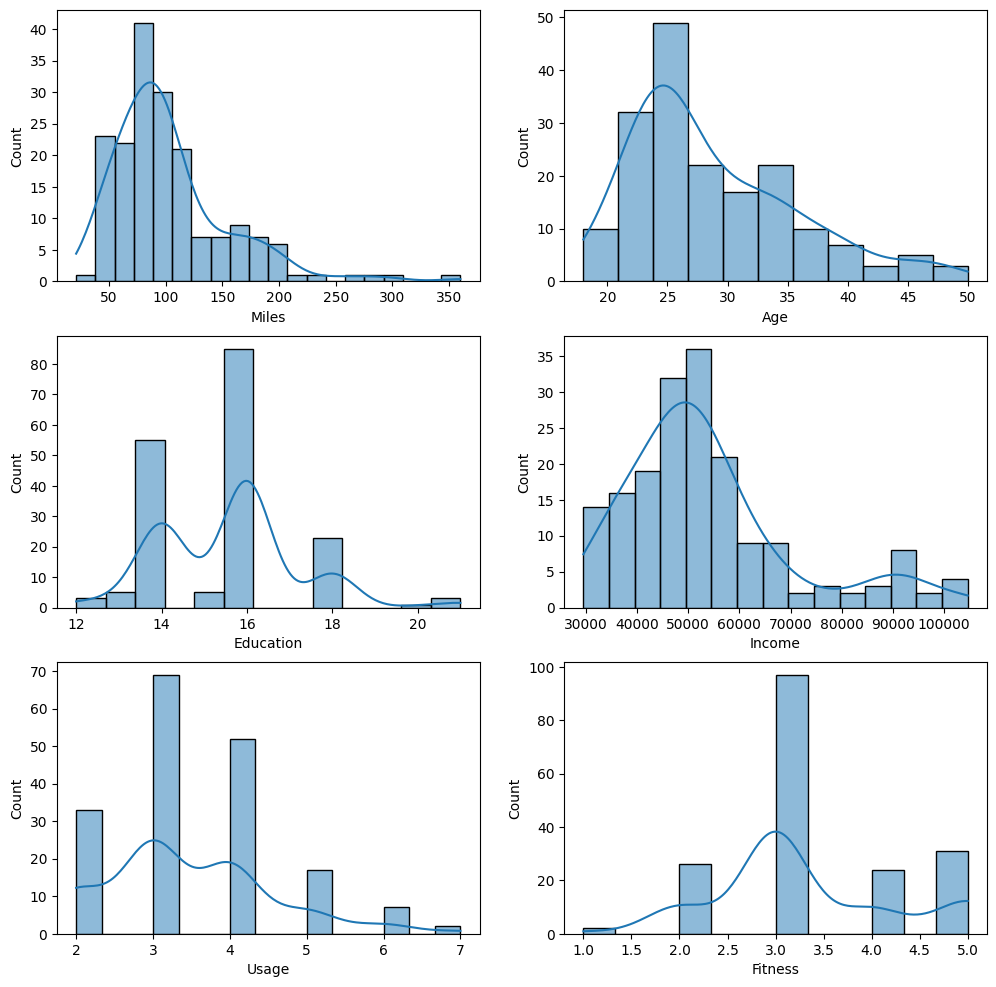

In [ ]:
# Plotting the figuresize and axis
fix , axis = plt.subplots(nrows = 3,ncols = 2, figsize = (12,12))

# Plotting the charts
sns.histplot(data = data , x = "Miles", kde = True , ax = axis[0,0])
sns.histplot(data = data , x = "Age", kde = True , ax = axis[0,1])
sns.histplot(data = data , x = "Education", kde = True , ax = axis[1,0])
sns.histplot(data = data , x = "Income", kde = True , ax = axis[1,1])
sns.histplot(data = data , x = "Usage", kde = True , ax = axis[2,0])
sns.histplot(data = data , x = "Fitness", kde = True , ax = axis[2,1])

# Showing the charts
plt.show()




# INSIGHT

#Majority of the products is purchased by the age group of 24 to 32

#Majority of the people having the education of 16 year are buying the products

#People mostly use these product three days in a week3

#Average rating of the people is 3 according to the data






#Outlier Detection Using The Boxplot

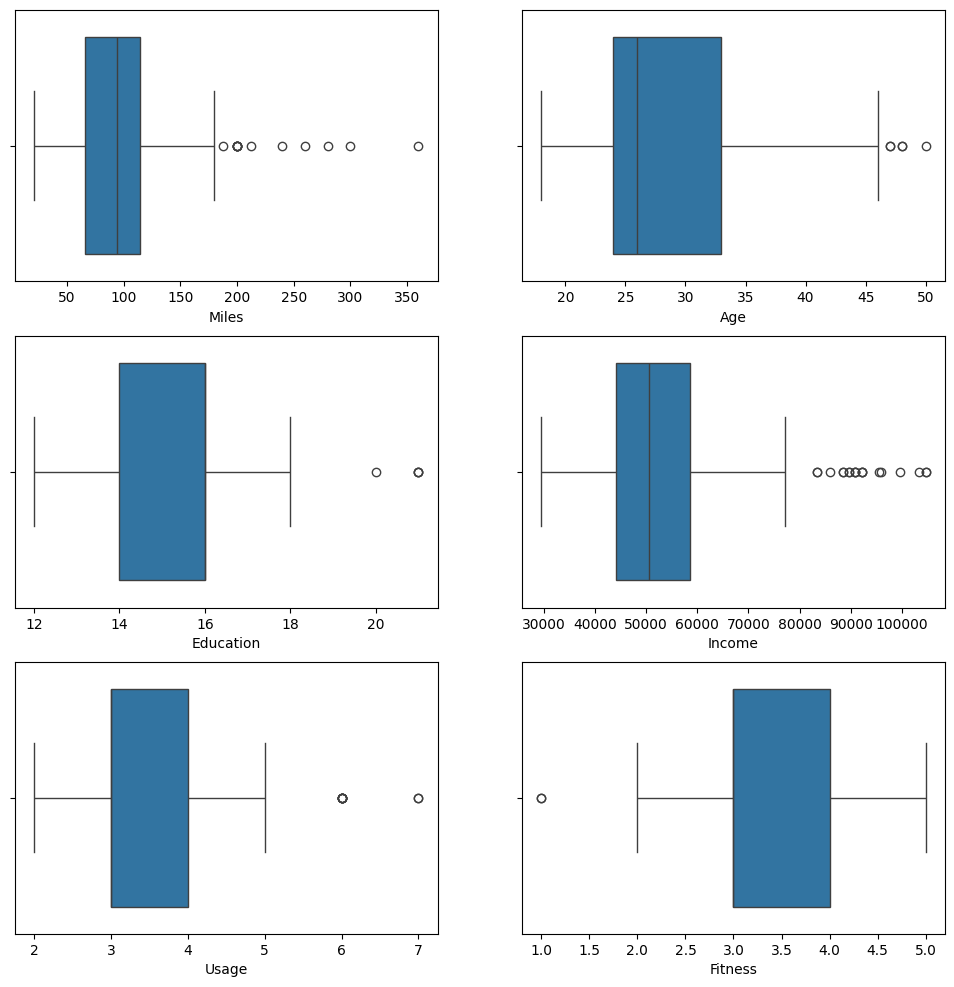

In [ ]:
# Plotting the figuresize and axis
fix , axis = plt.subplots(nrows = 3,ncols = 2, figsize = (12,12))

# Plotting the charts
sns.boxplot(data = data , x = "Miles", ax = axis[0,0])
sns.boxplot(data = data , x = "Age", ax = axis[0,1])
sns.boxplot(data = data , x = "Education", ax = axis[1,0])
sns.boxplot(data = data , x = "Income", ax = axis[1,1])
sns.boxplot(data = data , x = "Usage", ax = axis[2,0])
sns.boxplot(data = data , x = "Fitness", ax = axis[2,1])

# Showing the charts
plt.show()

# INSIGHT

# Income and Miles have most of outliers rest all data has minimum outliers

COUNTPLOTS

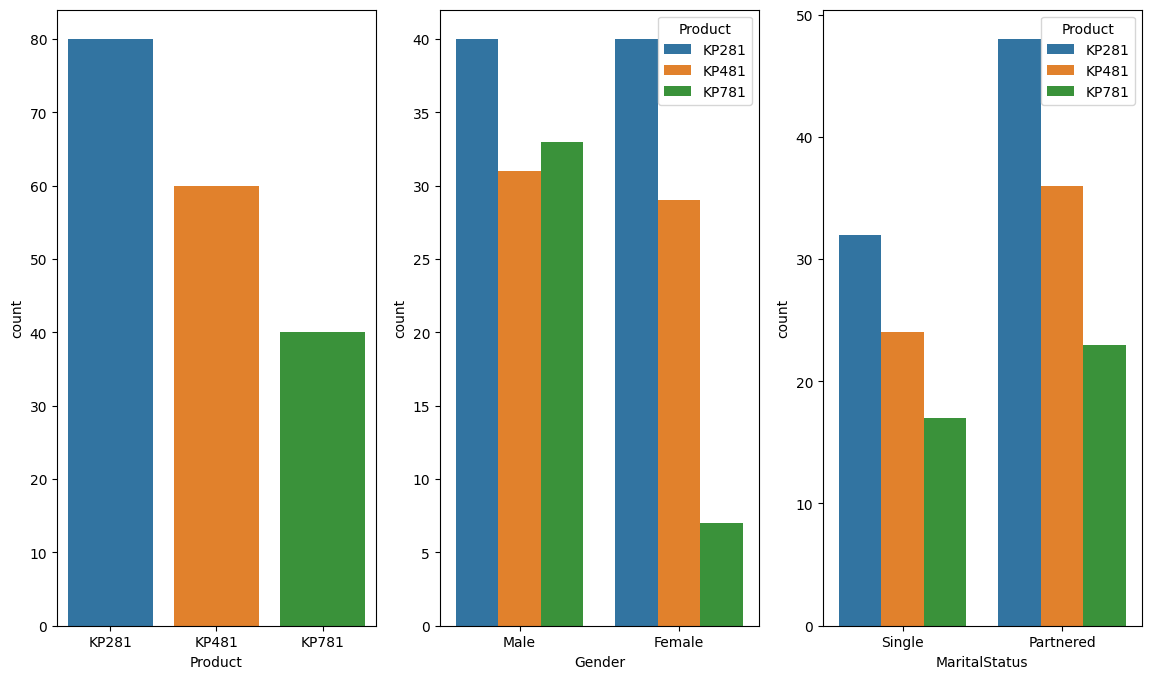

In [ ]:
# Plotting the figuresize and axis
fig, axis = plt.subplots(nrows = 1, ncols= 3, figsize = (14,8))

# Plotting the charts
sns.countplot(data = data , x = "Product",hue ="Product", ax = axis[0],)
sns.countplot(data = data , x = "Gender", hue = "Product", ax = axis[1])
sns.countplot(data = data , x = "MaritalStatus",hue = "Product", ax = axis[2])


# Showing the plots
plt.show()

#INSIGHT

#KP281 is the most selling products

#There are more males buying the poducts over females

#Partnered status is using the product most

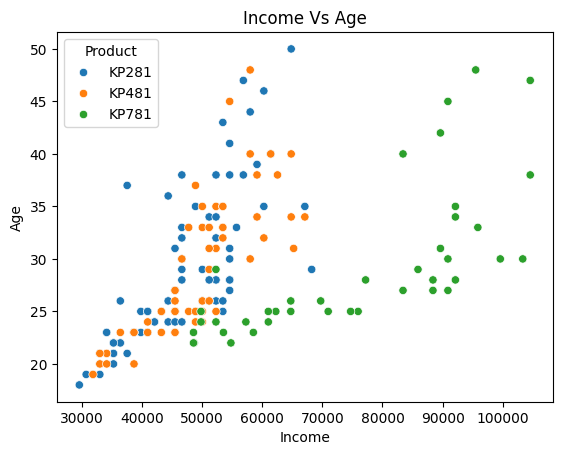

In [ ]:
# Plotting the charts
sns.scatterplot(x = data['Income'], y = data['Age'], hue = data['Product'])
plt.title("Income Vs Age")

# Showing the plot
plt.show()

#INSIGHT

#Product KP281 is most used between 22 to 30 age and their income is between 40000 - 55000

#Product KP781 is used by people who has income between 50000 to 100000



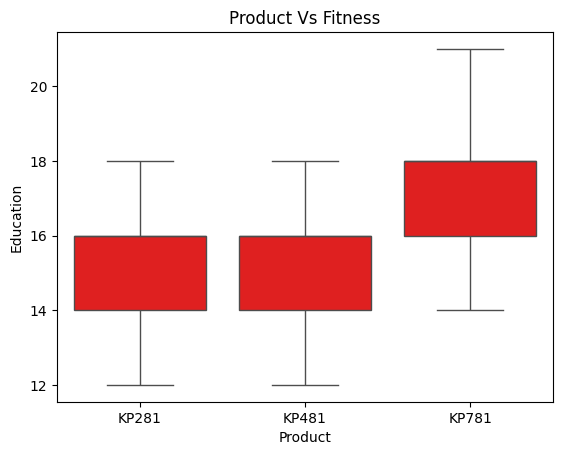

In [ ]:
sns.boxplot(x = data['Product'], y = data['Education'], color = "Red")
plt.title("Product Vs Education")

plt.show()

#INSIGHT

#People with above 16 years of experince tend to buy the latest products. i.e, KP781

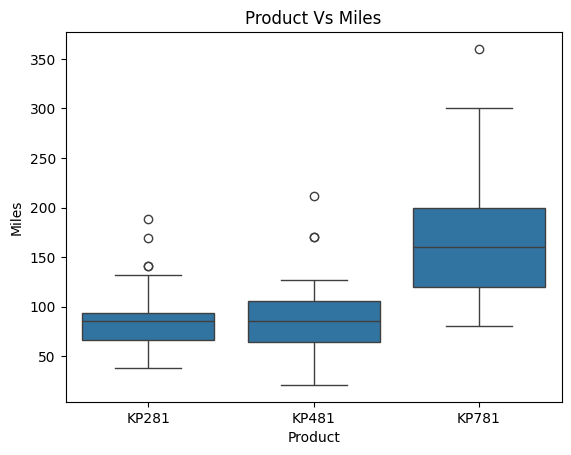

In [ ]:
sns.boxplot(x = data['Product'], y = data['Miles'])
plt.title("Product Vs Miles")

plt.show()

#INSIGHT

#People running or walking over 120 miles per week are using KP781

People with

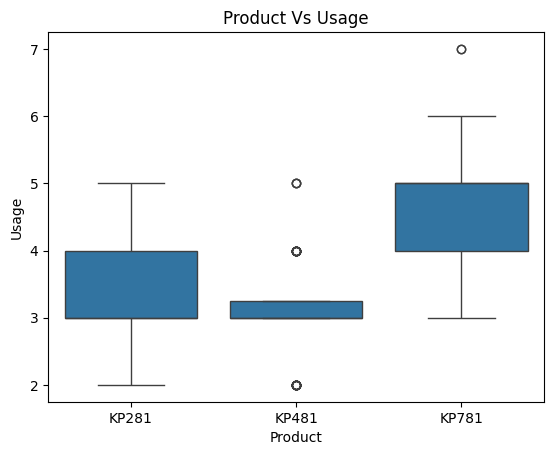

In [ ]:
sns.boxplot(x = data['Product'], y = data['Usage'])
plt.title("Product Vs Usage")

plt.show()

#INSIGHT

#People who are using the products more then 4 days a week have highest possibility that the product is KP781

# PAIRPLOT

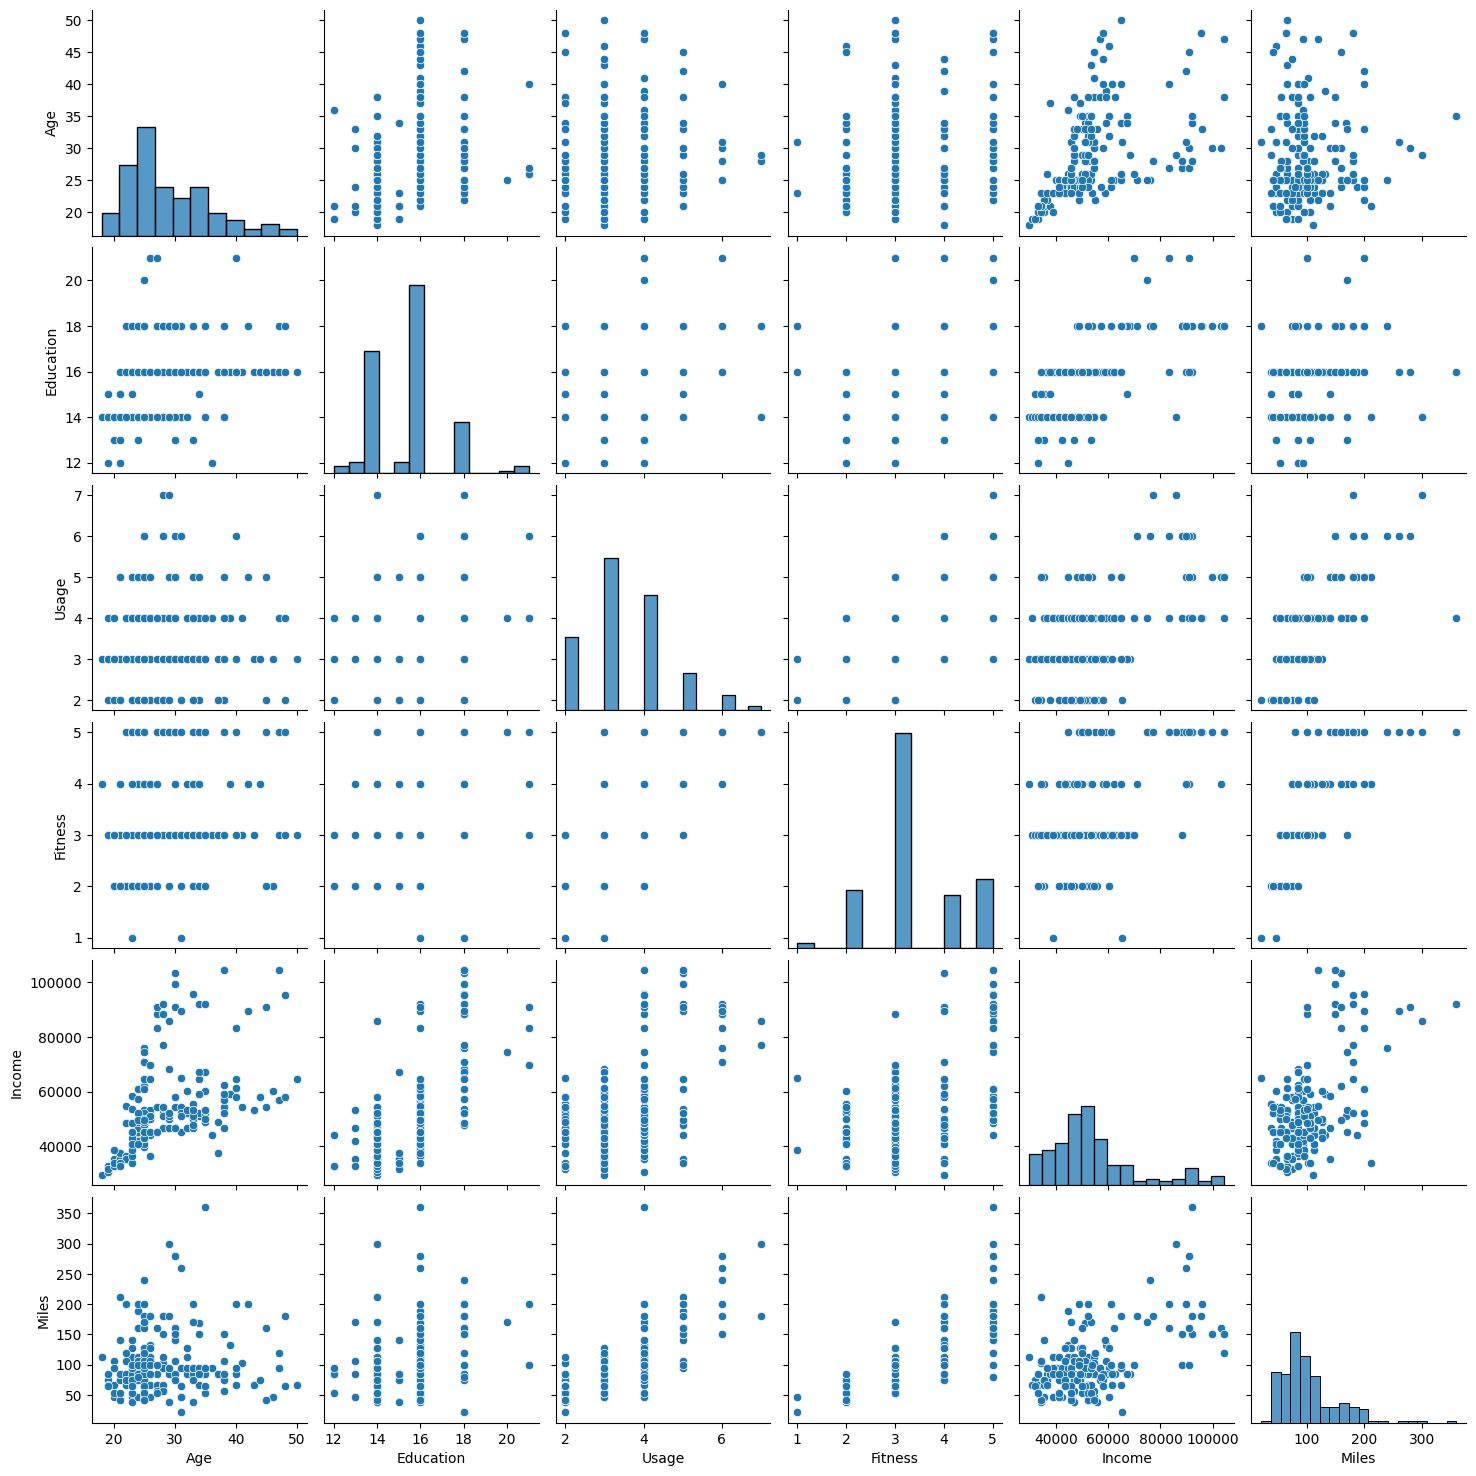

In [ ]:
sns.pairplot(data = data)

plt.show()

# Heatmap And Co-relation

In [ ]:
data.corr(numeric_only = True)

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


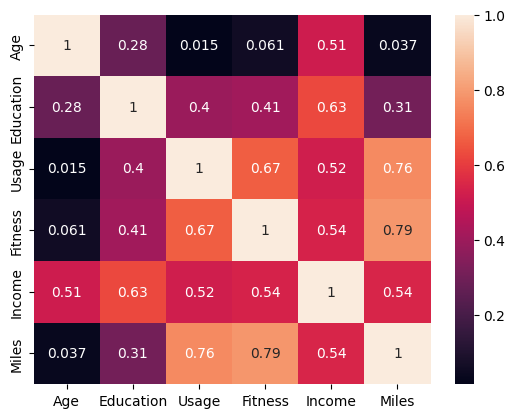

In [ ]:
sns.heatmap(data.corr(numeric_only = True), annot = True)

plt.show()

# INSIGHT

#Fitness and Miles (Higher the miles more the fitness)

#Usage and Miles (Higher the miles more the usage)

#Fitness and Usage (Higher the usage more the fitness)

#Income and education(Higher the Education more the Income)


# We can also see less corelation between:-

#Age and Usage

#Age and Miles

#Age and Fitness( As the age increases there is very less growth in usage, miles and fitness)

# Two-Way Contigency Table And Heatmap

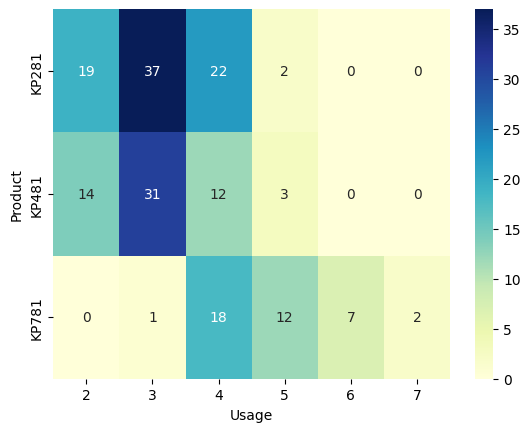

In [ ]:
sns.heatmap(pd.crosstab(data['Product'], data['Usage']), annot = True, cmap = "YlGnBu")

plt.show()

In [ ]:
pd.crosstab(data['Product'], data['Fitness'], margins = True)

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


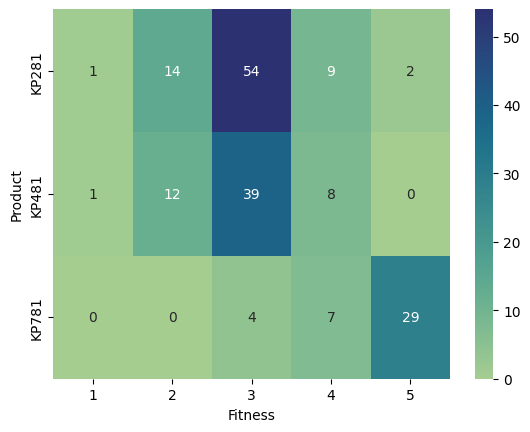

In [ ]:
sns.heatmap(pd.crosstab(data['Product'], data['Fitness']), annot = True, cmap = "crest")

plt.show()

# INSIGHT

**Out of 40 people using KP781. 29 people claims to have highest fitness 5(i.e. Probablity of fitness 5 given the product of KP781 is 29/40 = 0.725)**

In [ ]:
pd.crosstab(data['Product'], data['Gender'], margins = True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


# INSIGHT

**Out of 40 people using KP781. 33 people are Males (i.e. Probablity of males given the product is KP781 is 33/40 = 0.825)**

In [ ]:
data1 = data[['Product', 'Gender', 'MaritalStatus']].melt()

In [ ]:
print(data1.groupby(['variable', 'value'])['value'].count()/data.shape[0])

variable       value    
Gender         Female       0.422222
               Male         0.577778
MaritalStatus  Partnered    0.594444
               Single       0.405556
Product        KP281        0.444444
               KP481        0.333333
               KP781        0.222222
Name: value, dtype: float64


#MARGINAL PROBABLITY

**57.78 % of the people are male user**

**59.44% of the people are partnered**

**44.44 % uses KP281**

**33.33 % uses KP481**

**22.22 % uses KP781**

# BUSINESS INSIGHTS

* **There are three unique products('KP281', 'KP481', 'KP781') where kP281 is the entry level and KP481 is intermediate and KP781 is a bit advanced level.**

* **Majority of the product is purchased in the age group of 24 to 32**

* **Mojority of the people having total education of 16 year are buying this product**

* **According to the data average fitness rating of the people is 3**

* **KP281 is the nost selling products**

* **There are more male buying the products over females (57.78 % of the user is male )**

* **More status of the person are partnered who uses these products**

* **Mojority of the data lies between the 22 to 30 age group and 40000 to 55000 income**

* **People with above 16 tends to buy KP281**

* **People running or walking over 120 miles per week are using KP781**

* **People who are using the products more then 4 days a week have highest possibility that the product is KP781**


# BUSINESS RECOMENDATION

* **Aerofit can target age group of 24 to 32 which are more enthutistic buyer of the fitness products**

* **According to the data partnered people are more likely to buy the product so company can run some campaign to attract single people**

* **Aerofit can make some Tie-up with the fitness watches which will collect data and then can target the people who walks or runs more than 120 miles**

* **Aerofit can target people with income above 55000, who will serve easy customer for KP781**

* **People who are using KP281 but have income more than 55000 can be recommmended to upgrade to KP781**

* **As aeofit have more of male custmores they can provide some offers or coupens to the females to attract them as customer**  
